In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crypto_combine.csv to crypto_combine.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("crypto_combine.csv")
df.head()


,Crypto,Date,Open,High,Low,Close
0,BTC,12/31/19,7254.0,7309.0,7132.0,7171.0
1,BTC,12/30/19,7402.0,7430.0,7217.0,7254.0
2,BTC,12/29/19,7334.0,7529.0,7295.0,7402.0
3,BTC,12/28/19,7235.0,7359.0,7235.0,7334.0
4,BTC,12/27/19,7208.0,7267.0,7087.0,7235.0


,Crypto,Date,Open,High,Low,Close
0,BTC,12/31/19,7254.0,7309.0,7132.0,7171.0
1,BTC,12/30/19,7402.0,7430.0,7217.0,7254.0
2,BTC,12/29/19,7334.0,7529.0,7295.0,7402.0
3,BTC,12/28/19,7235.0,7359.0,7235.0,7334.0
4,BTC,12/27/19,7208.0,7267.0,7087.0,7235.0


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7899 entries, 0 to 7898
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crypto  7899 non-null   object 
 1   Date    7899 non-null   object 
 2   Open    7899 non-null   float64
 3   High    7899 non-null   float64
 4   Low     7899 non-null   float64
 5   Close   7899 non-null   float64
dtypes: float64(4), object(2)
memory usage: 370.4+ KB


,Open,High,Low,Close
count,7899.000000,7899.000000,7899.000000,7899.000000
mean,5479.620176,5623.947143,5324.149024,5480.870398
std,12010.579332,12325.039614,11665.236339,12011.567525
min,0.140000,0.150000,0.120000,0.140000
25%,12.720000,13.410000,12.405000,12.680000
50%,170.910000,176.240000,163.320000,170.890000
75%,3879.000000,3962.000000,3757.000000,3878.935000
max,67802.000000,68925.000000,66112.000000,67802.000000


In [ ]:
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date (VERY IMPORTANT for time series)
df = df.sort_values('Date')

# Remove Crypto column (not useful for prediction)
df = df.drop(columns=['Crypto'])

# Check missing values
df.isnull().sum()


/tmp/ipython-input-1208634450.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:

df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_21'] = df['Close'].rolling(window=21).mean()

# Remove NaN values created by rolling
df = df.dropna()

df.head()


,Date,Open,High,Low,Close,MA_7,MA_21
5553,2018-01-06,241.93,305.00,240.00,280.53,4781.518571,3860.314286
7528,2018-01-06,2.47,2.83,2.46,2.63,4747.608571,3860.339524
3578,2018-01-06,957.45,1005.00,950.40,998.70,2758.708571,3897.152381
724,2018-01-06,16765.00,17118.00,16255.00,16849.00,5131.358571,4663.437619
3577,2018-01-07,998.69,1098.00,997.87,1098.00,5151.358571,4071.199524


In [ ]:
X = df[['Open', 'High', 'Low', 'MA_7', 'MA_21']]
y = df['Close']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 57.23694402072214
RMSE: 151.76742530268902
R² Score: 0.9997684640506423


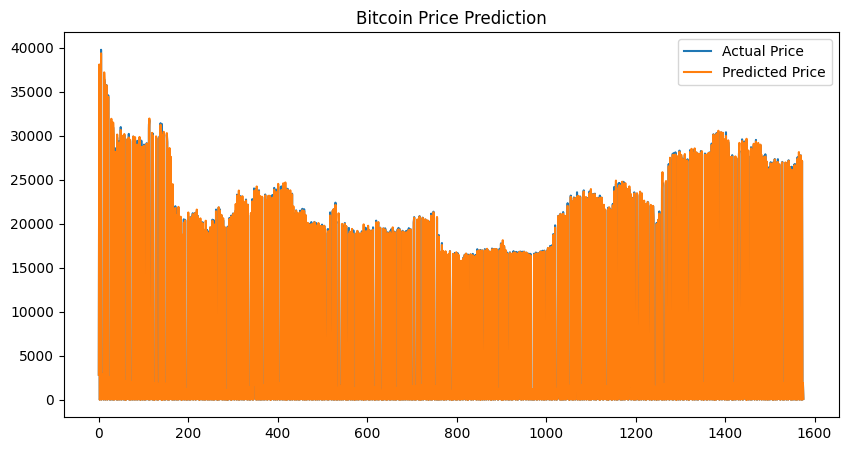

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_pred, label="Predicted Price")
plt.legend()
plt.title("Bitcoin Price Prediction")
plt.show()
